In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings (action= 'ignore')
plt.style.use(['seaborn-bright' , 'dark_background'])

In [63]:
data = pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [64]:
# To drop the missing values , we use dropna()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

### Checking the dataset distribution 

In [65]:
data['churn'].value_counts() / len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [66]:
X = data.drop(columns= ['churn' , 'customer_id']).values
Y = data['churn'].values

### Splitting the data

In [67]:
from sklearn.model_selection import train_test_split as tts
x_train , x_test , y_train , y_test = tts(X , Y , test_size= 0.2 , stratify= Y) 
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

### Scaling the data

In [68]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
x_train = Sc.fit_transform(x_train)
x_test = Sc.transform(x_test)

## XGBOOST

In [69]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(x_train , y_train)

[11:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Confusion Matrix and Accuracy Score for XGBOOST

In [70]:
from sklearn.metrics import confusion_matrix , accuracy_score 
y_pred = xg_classifier.predict(x_test)
cm = confusion_matrix(y_test , y_pred)
print(cm)
accuracy_score(y_test , y_pred)

[[3365  194]
 [ 478  377]]


0.847757136384232

### Applying Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
me = LogisticRegression()
classifier = LogisticRegression()
classifier.fit(x_train , y_train)

LogisticRegression()

### Predicted_values

In [72]:
predicted_values = classifier.predict(x_test)
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred) , 1) , y_test.reshape(len(y_test) , 1)) , 1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Predicted Probabilities 

In [74]:
predicted_probabilities = classifier.predict_proba(x_test)
predicted_probabilities

array([[0.83281966, 0.16718034],
       [0.83041943, 0.16958057],
       [0.75765009, 0.24234991],
       ...,
       [0.83617016, 0.16382984],
       [0.8519105 , 0.1480895 ],
       [0.80749691, 0.19250309]])

### Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix , accuracy_score 
cm = confusion_matrix(y_test , predicted_values)
print(cm)
accuracy_score(y_test , predicted_values)


[[3538   21]
 [ 794   61]]


0.8153602174898051

### Applying k-Fold Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier , X = x_train , y = y_train , cv = 500)
# CV -> Number of train-test folds

print("Accuracy : {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation : {:.2f} %".format(accuracies.std() * 100))

Accuracy : 81.74 %
Standard Deviation : 2.52 %


### Grid Search

In [77]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {'penalty' : ['l1' , 'l2' , 'elasticnet' , 'none'],
     'C' : [0.01 , 0.1 , 1],
     'solver' : ['lbfgs' , 'newton-cg' , 'liblinear', 'saga'],
     'max_iter' : [10 , 50 , 100]}
    ]

### Randamized Search CV

In [78]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator= classifier , param_distributions= parameters , cv = 50 , return_train_score= False ,n_iter = 20)
rs.fit(x_train , y_train)
me = pd.DataFrame(rs.cv_results_)[['param_C' , 'param_solver','mean_test_score']]
me.nlargest(n = 10 , columns = 'mean_test_score')

,param_C,param_solver,mean_test_score
11,1,lbfgs,0.817594
16,0.01,lbfgs,0.817594
15,0.01,newton-cg,0.817480
5,0.01,newton-cg,0.816857
0,0.1,liblinear,0.816348
4,0.1,liblinear,0.814026
6,0.1,lbfgs,0.814026
3,0.01,liblinear,0.809211
10,0.01,liblinear,0.809211
17,0.01,lbfgs,0.809041


### Re-appyling Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 1 , solver= 'liblinear')
LR.fit(x_train , y_train)

LogisticRegression(C=1, solver='liblinear')

In [80]:
y_pred = LR.predict(x_test)
y_pred_proba = LR.predict_proba(x_test)

In [81]:
from sklearn.metrics import confusion_matrix , accuracy_score 
cm = confusion_matrix(y_test , y_pred)
print(cm)
accuracy_score(y_test , y_pred)

[[3538   21]
 [ 794   61]]


0.8153602174898051

### Classification Report

In [82]:
from sklearn.metrics import  classification_report
k = classification_report(y_test , y_pred)
print(k)

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.74      0.07      0.13       855

    accuracy                           0.82      4414
   macro avg       0.78      0.53      0.51      4414
weighted avg       0.80      0.82      0.75      4414



### Precision Recall Curve

In [83]:
from sklearn.metrics import  precision_recall_curve
precision_points , recall_points , threshold_points = precision_recall_curve(y_test , y_pred_proba[: , 1])
precision_points.shape , recall_points.shape , threshold_points.shape

((4415,), (4415,), (4414,))

### Plotting the Precision Recall Curve

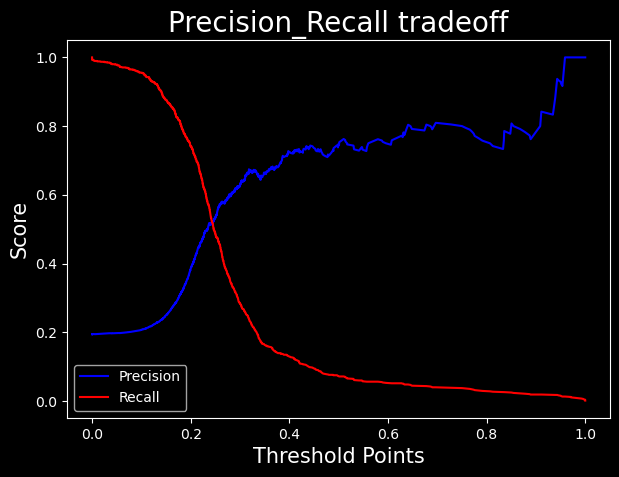

In [84]:
plt.figure(figsize= (7,5) , dpi = 100)
plt.plot(threshold_points , precision_points[:-1] , color = 'blue' , label = 'Precision')
plt.plot(threshold_points , recall_points[:-1] , color = 'red' , label = 'Recall')
plt.xlabel("Threshold Points" , fontsize = 15)
plt.ylabel("Score" , fontsize = 15)
plt.title("Precision_Recall tradeoff" , fontsize = 20)
plt.legend()
plt.show()

## AUC - ROC Curve 

In [85]:
from sklearn.metrics import roc_curve , roc_auc_score 
fpr ,tpr , threshold = roc_curve(y_test , y_pred_proba[:,1])

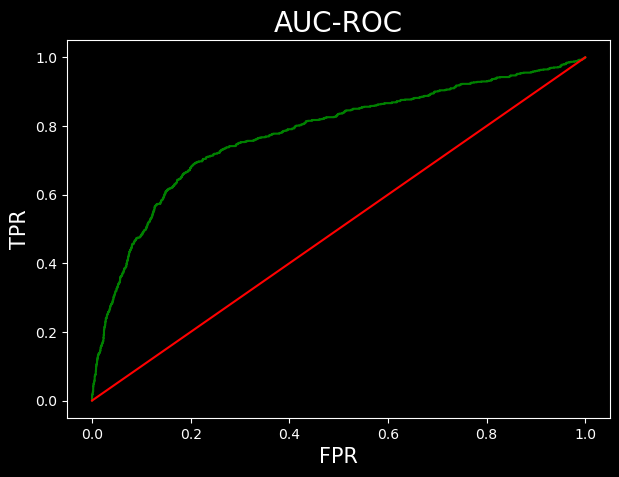

0.77778402172895

In [86]:
plt.figure(figsize = (7,5) , dpi = 100)
plt.plot(fpr , tpr , color = 'green')
plt.plot([0,1] , [0,1] , label = 'baseline' , color = 'red')
plt.xlabel('FPR' , fontsize = 15)
plt.ylabel('TPR' , fontsize = 15)
plt.title('AUC-ROC' , fontsize = 20)
plt.show()
roc_auc_score(y_test , y_pred_proba[:,1])

### Coefficient Plot

In [87]:
x = data.drop(columns = ['churn' , 'customer_id']).columns
c = LR.coef_.reshape(-1)

coeff_plot = pd.DataFrame({
                            'coefficients' : c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
9,-3.555802,current_balance
13,-0.496572,current_month_credit
10,-0.342624,previous_month_end_balance
14,-0.259033,previous_month_credit
0,-0.157601,vintage


Text(0.5, 1.0, 'Coefficient Plot')

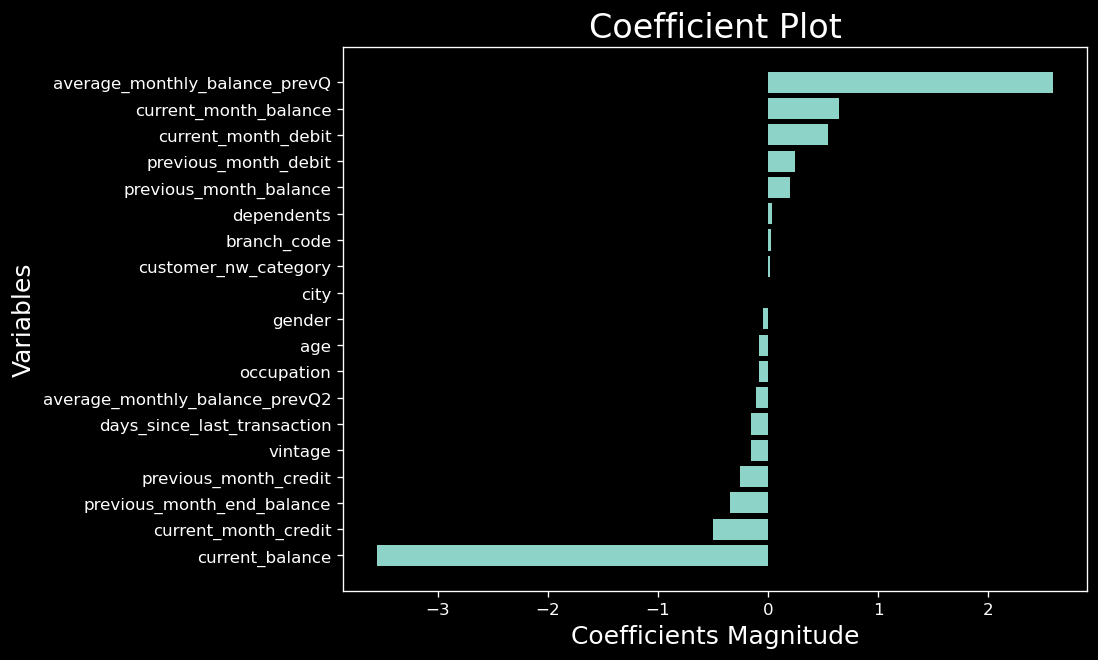

In [88]:
plt.figure(figsize = (8,6) , dpi = 120)
plt.barh(coeff_plot['variable'] , coeff_plot['coefficients'])
plt.xlabel("Coefficients Magnitude" , fontsize = 15)
plt.ylabel("Variables" , fontsize = 15)
plt.title("Coefficient Plot" , fontsize = 20)

### Conclusion

The first three variables(average_monthly_balance_prevQ , current_month_debit and current_month_balance) shows us that higher these values are more likely are the chances that the customer churns. 

Whereas the last 2 variables (current_balance and current_month_credit) shows us that lower these values are less likely are the chances for the customer to chrun.